# Statistical Pattern Recognition Exercise 5: Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


# get the default color cycle from matplotlib
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
def get_color(i):
    return color_cycle[i % len(color_cycle)]


## $\star$ Part 1: Linear Regression with polynomials

### Part 1.1: Load and plot data

Load the points from `regression.npz`.

The data contains $N$ datapoints and 2 columns with column 0 as x-axis (inputs $\mathbf{x}$) and feature 1 as y-axis (targets $\mathbf{t}$). Scatterplot the data.


In [2]:
# START TODO ################
# Load the data and print the shape
data = np.load("../data/regression.npz")
data = data[data.files[0]]

# END TODO ################


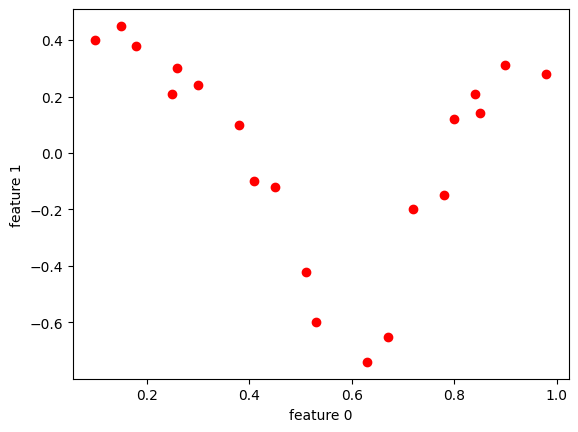

In [3]:
# START TODO ################
# Scatterplot the data.
# As usual feature 0 is the x-axis and feature 1 is the y-axis.
x = data[:, 0]
t = data[:, 1]
plt.scatter(x, t, color = 'red', marker='o')
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()
# END TODO ################


### Part 1.2: Implementation

Now the goal is to estimate the weight parameters using $m^{\textrm{th}}$ order polynomials as basis functions using the ML Estimator.

Implement function `get_poly_features` - Get the polynomial features given inputs $\mathbf{x}$ and polynomial degree $m$. Compute the $M = m + 1$ basis functions with $\phi_m(x_n) = x_n ^ m $ for $m = \{0, ..., M\}$ and $n = \{0, ..., N-1\}$. Return a matrix $\Phi$ of shape $(N, M+1)$.

Implement a predictor class with the following functions:

1. `fit` - Estimate and save the weight parameters using the ML estimator. Hint: `np.linalg.inv` can inverse matrices.
1. `predict` - Predict targets given inputs.

Then:

1. Create the predictor, fit the given data.
1. Predict the targets for the given $\mathbf{x}$, print the mean squared error (MSE) and scatterplot the predictions.
1. Predict the targets for a suitable range of inputs and plot them to view the whole polynomial.

See how the outcome changes as you change $m$.


Example output:

![ex5_example_output_01.png](ex5_example_output_01.png)


In [4]:
# START TODO ################
# note the shapes:
# x: inputs of shape (n_datapoints)
# t: targets of shape (n_datapoints)
# m: degree of the polynomial
# See implementation text above for hints on how to build the predictor.
class PolyRegression:
    def __init__(self, m):
        self.m = m


    def _generate_phi(self, x): #this is private method
        M = self.m + 1
        phi = np.empty((x.shape[0], M))
        for i in range(x.shape[0]):
            for j in range(M):
                phi[i, j] = x[i] ** j
        return phi
    
    def fit(self, x, t):
        phi = self._generate_phi(x)
        self.w = np.linalg.inv(phi.T @ phi) @ phi.T @ t
        return self

    def predict(self, x):
        if self.w is None:
            raise ValueError("Model is not fitted yet. Call fit() first.")
        phi = self._generate_phi(x)
        return phi @ self.w




# END TODO ################


MSE for 0: 0.127666
MSE for 1: 0.11847378948685772
MSE for 2: 0.04143524713441047
MSE for 3: 0.0361938925894742
MSE for 4: 0.015757837815626362
MSE for 5: 0.00816995605365386


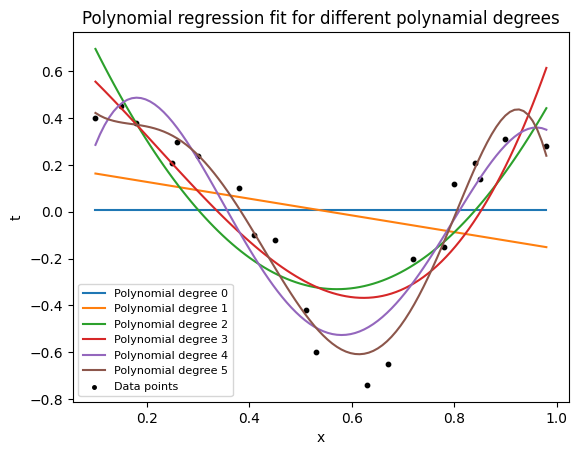

<Figure size 2000x1200 with 0 Axes>

In [5]:
# START TODO ################
# Build a function: Given data, labels and degree of the polynomial
# create and fit the predictor, predict the data, print the MSE and plot
# the polynomials and data.
# Run the function on a suitable set of inputs.
# If your plot gets too zoomed out, use plt.ylim([ymin, ymax]) with suitable
# limits to constrain the y-axis.
def fit_and_plot(data, m_max):
   
    x = data[:, 0]
    t = data[:, 1]
    x_min = min(x)
    x_max = max(x)
    

    for m in range(m_max + 1):
        model = PolyRegression(m)
        model.fit(x, t)                  
        y_pred = model.predict(x)

        print(f'MSE for {m}: {np.mean((y_pred-t)**2)}')
        weights = model.w
        def polynomial(x):
            y = 0
            for i in range(len(weights)):

                y += weights[i] * x ** i
            return y
        
        grid = np.linspace(x_min, x_max, 100)
   
        y_pred_grid = polynomial(grid)
        plt.plot(grid, y_pred_grid,  label=f'Polynomial degree {m}', linewidth=1.5)
    
fit_and_plot(data, 5)

plt.scatter(x, t, color='black', marker='o', label='Data points', s = 10)
plt.legend(fontsize=8, markerscale=0.8)
plt.xlabel('x')
plt.ylabel('t')
plt.title('Polynomial regression fit for different polynamial degrees')
plt.figure(figsize=(20, 12)) 
plt.show()

# END TODO ################



## $\star$ $\star$ Part 2: Ridge regression

### Part 2.1: Ridge Regression using sklearn

Estimate the weights using the MAP estimator with the Gaussian prior
from this class (Ridge Regression). Use class `Ridge` from sklearn as the predictor.

Note the difference between Regularized Least Squares [1] used by sklearn's `Ridge` class with parameter $\lambda$ and Bayesian Linear Regression with a zero-mean isotropic Gaussian prior [2] as used in the slides with parameters $\alpha$ and $\beta$. The resulting weights and the mean predictions are equivalent for $\lambda = \alpha\ /\ \beta$. Parameter $\beta$ is a prior for the precision of the prediction.

Create the function `reg_ridge_sci` with parameters `x, y, t, alpha=0.001, beta=10` and create the predictor with `lambda = alpha / beta` and `Ridge(alpha=lambd, solver="svd", fit_intercept=False)`. We can set `fit_intercept=False` since the polynomial with degree 0 will act as the intercept.

To use this predictor, **either** reuse the function `get_poly_features` from above to create the polynomial input features for the Ridge model **or** create a pipeline: `make_pipeline(PolynomialFeatures(degree=m), Ridge(...))`. Note that in the second case you will need to expand the inputs `expa_x = x[:, None]` since sklearn expects inputs of shape `(n_datapoints, d_features)` even if `d_features == 1`.

- Print the MSE.
- Plot the true labels and the predictions. 
- Create a suitable input range and predict its targets to plot the polynomial line.
- **Bonus**: Compute the standard deviation for a plot in the style of slide 15. Compute the inverse posterior covariance $S_N$ given the data (slide 11). Now, compute the prediction variance for the input range (eqn. 3, slide 14). This can be tricky in numpy. Given matrices `A` and `B` both of shape `(N, D)`, to get the `N` dot products you can use `np.einsum("nd,nd->n", A, B)`. Alternatively, use slow for-loops. Compute standard deviation as square root of variance. Use `plt.fill_between` and set the transparency `alpha=0.2` to plot the standard deviation. Use `plt.ylim` to constrain the plot within `np.min(t) - 1, np.max(t) + 1`.

See what happens as you use fewer and fewer points to estimate the weights.

Also see what happens as you change the hyperparameters $\alpha$, $\beta$ and the order of the
polynomial $m$. When must it be large, when can it be chosen smaller?

- [1] Christopher M. Bishop, Pattern Recognition and Machine Learning, p. 144, eqn. 3.27
- [2] Christopher M. Bishop, Pattern Recognition and Machine Learning, p. 153, eqn. 3.55


Example output for few datapoints:

![ex5_example_output_02.png](ex5_example_output_02.png)


MSE 0.016741692137794976


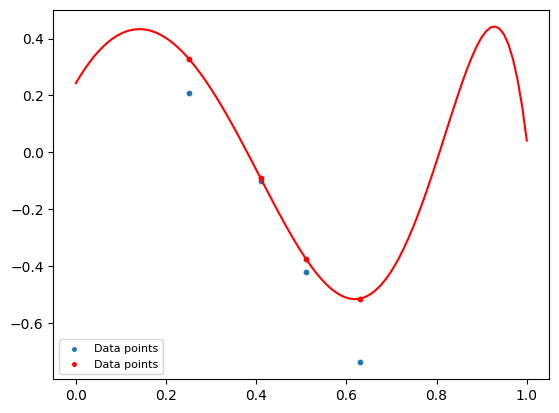

<Figure size 2000x1200 with 0 Axes>

In [6]:
# START TODO ################
# Build the reg_ridge_sci function as described above.
# beta is the believe how noisy the data is(likelihood), and alpha is the weigth precision(prior)
#  this slow alpha means we dont penalize high weigths, and the noise variance ist 1/10 = 0.1 so we believe in low noise
from sklearn.model_selection import train_test_split
x = data[:, 0]
y = data[:, 1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

def reg_ridge_sci(x, y, t, alpha = 0.001, beta = 10, degree = 10):
    lam = alpha/beta
    rid = Ridge(alpha=lam, solver="svd", fit_intercept=False)
    model = make_pipeline(PolynomialFeatures(degree),
                          rid)
    expa_x = x[:, None]
    expa_t = t[:, None]
    model.fit(expa_x, y)

  
    return model.predict(expa_t)

y_preds = reg_ridge_sci(x_train, y_train, x_test)
poly = reg_ridge_sci(x_train, y_train, np.linspace(0,1,100))

print(f'MSE {np.mean((y_preds-y_test)**2)}')
plt.scatter(x_test, y_test, marker='o', label='Data points', s = 10)
plt.scatter(x_test, y_preds, marker='o', color = 'red', label='Data points', s = 10)
plt.plot(np.linspace(0,1,100), poly, color = 'red')
plt.legend(fontsize=8, markerscale=0.8)


plt.figure(figsize=(20, 12)) 
plt.show()   
    
# END TODO ################


#### Varying polynomial degree $m$

In [7]:
# START TODO ################
# Run the regression multiple times with varying polynomial degree m.
# What do you observe?
for m in range(20):
    y_preds = reg_ridge_sci(x_train, y_train, x_test, degree=m)
    print(f'MSE for degree {m}: {np.mean((y_preds-y_test)**2)}')

# END TODO ################


MSE for degree 0: 0.23994694599343205
MSE for degree 1: 0.23446555504085403
MSE for degree 2: 0.0699269263911419
MSE for degree 3: 0.06122289548898701
MSE for degree 4: 0.05270885900472797
MSE for degree 5: 0.035045522030707196
MSE for degree 6: 0.024200814687150612
MSE for degree 7: 0.019218991268993596
MSE for degree 8: 0.01725079727600756
MSE for degree 9: 0.016756114255019626
MSE for degree 10: 0.016741692137794976
MSE for degree 11: 0.016655145120352606
MSE for degree 12: 0.01631216550238526
MSE for degree 13: 0.015738104099676103
MSE for degree 14: 0.015033218184744807
MSE for degree 15: 0.014299100606063427
MSE for degree 16: 0.01361058247339356
MSE for degree 17: 0.013011397873922977
MSE for degree 18: 0.012519573722857289
MSE for degree 19: 0.01213533206807382


#### Varying dataset size $N$

In [8]:
# START TODO ################
# Fix m=5 and run the regression multiple times,
# this time varying the amount of data.
# What do you observe?
for i in range(7,21):
    x = data[:i, 0]
    y = data[:i, 1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)
    y_preds = reg_ridge_sci(x_train, y_train, x_test, degree=5)
    print(f'MSE for degree {i} data points: {np.mean((y_preds-y_test)**2)}')
    
# END TODO ################


MSE for degree 7 data points: 1.5671344271483603
MSE for degree 8 data points: 0.05774481234507198
MSE for degree 9 data points: 0.1487137525302707


MSE for degree 10 data points: 0.26798436139631165
MSE for degree 11 data points: 0.07432883578155344
MSE for degree 12 data points: 0.060582627153093156
MSE for degree 13 data points: 0.06333248141774052
MSE for degree 14 data points: 0.09815410487163838
MSE for degree 15 data points: 0.04821872059356688
MSE for degree 16 data points: 0.037362787665828866
MSE for degree 17 data points: 0.04773626707774095
MSE for degree 18 data points: 0.029111454272818374
MSE for degree 19 data points: 0.036079587101692484
MSE for degree 20 data points: 0.035045522030707196


#### Varying $\alpha$


In [9]:
# START TODO ################
# Vary alpha. What do you observe?
for alpha in np.logspace(-6, 6, 50):
     y_preds = reg_ridge_sci(x_train, y_train, x_test, degree=5, alpha = alpha)
     print(f'MSE for alpha =  {alpha} : {np.mean((y_preds-y_test)**2)}')
# END TODO ################


MSE for alpha =  1e-06 : 0.014848558081620406
MSE for alpha =  1.757510624854793e-06 : 0.015597546204300938
MSE for alpha =  3.0888435964774785e-06 : 0.01665592220210809
MSE for alpha =  5.428675439323859e-06 : 0.017982070963075962
MSE for alpha =  9.540954763499944e-06 : 0.01941565669008734
MSE for alpha =  1.67683293681101e-05 : 0.02074735487352866
MSE for alpha =  2.94705170255181e-05 : 0.02184496650804848
MSE for alpha =  5.1794746792312125e-05 : 0.02271874685537352
MSE for alpha =  9.102981779915228e-05 : 0.023514227677576625
MSE for alpha =  0.00015998587196060574 : 0.02451288629294577
MSE for alpha =  0.0002811768697974231 : 0.026169809537310493
MSE for alpha =  0.0004941713361323833 : 0.02907809740642841
MSE for alpha =  0.000868511373751352 : 0.033653466044472904
MSE for alpha =  0.0015264179671752333 : 0.0396244125605412
MSE for alpha =  0.0026826957952797246 : 0.0459833256809305
MSE for alpha =  0.004714866363457394 : 0.05167709553279817
MSE for alpha =  0.008286427728546842

#### Varying $\beta$



In [10]:
# START TODO ################
# Vary beta. What do you observe?
for beta in np.logspace(-6, 6, 50):
     y_preds = reg_ridge_sci(x_train, y_train, x_test, degree=5, beta = beta)
     print(f'MSE for alpha =  {beta} : {np.mean((y_preds-y_test)**2)}')
# END TODO ################


MSE for alpha =  1e-06 : 0.19535895984353838
MSE for alpha =  1.757510624854793e-06 : 0.1959618654425312
MSE for alpha =  3.0888435964774785e-06 : 0.1969658441946142
MSE for alpha =  5.428675439323859e-06 : 0.1985762344840725
MSE for alpha =  9.540954763499944e-06 : 0.2010092689416714
MSE for alpha =  1.67683293681101e-05 : 0.20436757780152293
MSE for alpha =  2.94705170255181e-05 : 0.2084508982761419
MSE for alpha =  5.1794746792312125e-05 : 0.21265351726384413
MSE for alpha =  9.102981779915228e-05 : 0.2160993996195714
MSE for alpha =  0.00015998587196060574 : 0.21785829181660735
MSE for alpha =  0.0002811768697974231 : 0.21694521043316858
MSE for alpha =  0.0004941713361323833 : 0.21218360629856176
MSE for alpha =  0.000868511373751352 : 0.20231449855286215
MSE for alpha =  0.0015264179671752333 : 0.18659704281568237
MSE for alpha =  0.0026826957952797246 : 0.1657790957383772
MSE for alpha =  0.004714866363457394 : 0.14263463337295396
MSE for alpha =  0.008286427728546842 : 0.120941

#### Fixing $\lambda = \alpha\ /\ \beta$ and varying their scale.



In [11]:
# START TODO ################
# Multiply both alpha and beta by the same varying constant.
# What do you observe?
for lam in np.logspace(-6, 6, 50):
     
     alpha = lam * 0.001
     beta = lam * 10
     y_preds = reg_ridge_sci(x_train, y_train, x_test, degree=5,alpha=alpha, beta = beta)

     print(f'MSE for alpha =  {alpha}, beta = {beta} : {np.mean((y_preds-y_test)**2)}')
# END TODO ################


MSE for alpha =  1e-09, beta = 9.999999999999999e-06 : 0.03504552203070695
MSE for alpha =  1.757510624854793e-09, beta = 1.757510624854793e-05 : 0.035045522030707196
MSE for alpha =  3.0888435964774784e-09, beta = 3.0888435964774785e-05 : 0.035045522030707196
MSE for alpha =  5.4286754393238595e-09, beta = 5.4286754393238594e-05 : 0.035045522030707196


MSE for alpha =  9.540954763499944e-09, beta = 9.540954763499944e-05 : 0.035045522030707196
MSE for alpha =  1.67683293681101e-08, beta = 0.000167683293681101 : 0.035045522030707196
MSE for alpha =  2.94705170255181e-08, beta = 0.00029470517025518097 : 0.035045522030707196
MSE for alpha =  5.1794746792312124e-08, beta = 0.0005179474679231212 : 0.035045522030707196
MSE for alpha =  9.102981779915228e-08, beta = 0.0009102981779915227 : 0.035045522030707196
MSE for alpha =  1.5998587196060574e-07, beta = 0.0015998587196060575 : 0.035045522030707196
MSE for alpha =  2.8117686979742313e-07, beta = 0.002811768697974231 : 0.035045522030707196
MSE for alpha =  4.941713361323833e-07, beta = 0.004941713361323832 : 0.035045522030707196
MSE for alpha =  8.68511373751352e-07, beta = 0.00868511373751352 : 0.035045522030707196
MSE for alpha =  1.5264179671752333e-06, beta = 0.015264179671752334 : 0.035045522030707196
MSE for alpha =  2.682695795279725e-06, beta = 0.026826957952797246 : 0.035045522030

### Part 2.2: Manual Ridge Regression

Create the class `PolyRidgeRegression` to replace sklearn's `Ridge`, see slides "Bayesian Regression" and "Posterior distribution" for the formulae.

Create a plot as in 2.2 and verify that the results match.


In [ ]:
# START TODO ################
# class PolyRidgeRegression:
class PolyRidgeRegression:
    def __init__(self, alpha = 0.01, beta = 10, degree = 10):
        self.degree = degree
        self.alpha = alpha
        self.beta = beta
        self.m_N = None


    def _generate_phi(self, x): #this is private method
        self.M = self.degree + 1
        phi = np.empty((x.shape[0], self.M))
        for i in range(x.shape[0]):
            for j in range(self.M):
                phi[i, j] = x[i] ** j
        return phi
    
    def fit(self, x, T):
        phi = self._generate_phi(x)
        self.S_N = self.alpha * np.eye(self.M) + self.beta* phi.T @ phi
        self.m_N = self.beta * np.linalg.inv(self.S_N) @ phi.T @ T
        return self

    def predict(self, x):
        if self.m_N is None:
            raise ValueError("Model is not fitted yet. Call fit() first.")
        phi = self._generate_phi(x)
        return phi @ self.m_N





# END TODO ################




In [40]:
def reg_ridge_own(x, t, alpha=0.001, beta=10, m=5):
    model = PolyRidgeRegression(alpha=alpha, beta=beta, degree=m)
    model.fit(x, t)
    return model.m_N

def reg_ridge_sci(x, t, alpha=0.001, beta=10, degree=5):
    lam = alpha / beta
    rid = Ridge(alpha=lam, solver="svd", fit_intercept=False)
    model = make_pipeline(PolynomialFeatures(degree), rid)
    expa_x = x[:, None]
    expa_t = t[:, None]
    model.fit(expa_x, expa_t)
    ridge_model = model.named_steps['ridge']
    weights = ridge_model.coef_
    return weights.flatten()

weights_own = reg_ridge_own(x, t, alpha=0.001, beta=10, m=5)
weights_sci = reg_ridge_sci(x, t, alpha=0.001, beta=10, degree=5)

print(weights_own)
print(weights_sci)


[  0.20350105   4.38568945 -20.2888234   12.47875752  19.85357441
 -16.22171762]
[  0.20350105   4.38568945 -20.2888234   12.47875752  19.85357441
 -16.22171762]


## $\star \star \star$ Part 3: Hyperparameter optimization with EM

Find the optimum hyperparameters using the evidence approximation. 
It is not that hard. You know EM and you know how to
estimate the weight parameters. Just combine these two. 

See slide 24 and Bishop 3.5.1 pages 166-169, especially eqn. 3.95.

Start the optimization with $\alpha_0=0.001, \beta_0=10$.
Create two plots using function `reg_ridge_sci` from question 2, one with the old hyperparameters and one with the optimized hyperparameters. The MSE should be lower in the second case because you have found better hyper-parameters.

Verify your results by fitting a `BayesianRidge` predictor from sklearn. The parameters are named differently: Create it as `BayesianRidge(lambda_init=alpha0, alpha_init=beta0, fit_intercept=False, verbose=True)`, fit and extract the results as `alpha = br.lambda_` and `beta = br.alpha_`. You should receive the same hyperparameters as in your own evidence approximation.


In [53]:
# START TODO ################
class EvidenceApproximator:
    def __init__(self, m, alpha0=alpha, beta0=beta, iter_steps=20):
        self.m = m
        self.alpha = alpha0
        self.beta = beta0
        self.iter_steps = iter_steps
        self.M = self.m + 1

    def _generate_phi(self, x): #this is private method
        
        phi = np.empty((x.shape[0], self.M))
        for i in range(x.shape[0]):
            for j in range(self.M):
                phi[i, j] = x[i] ** j
        return phi
    
    def E_step(self, x, T):
        phi = self._generate_phi(x)
        self.S_N = self.alpha * np.eye(self.M) + self.beta* phi.T @ phi
        self.m_N = self.beta * np.linalg.inv(self.S_N) @ phi.T @ T
        return self
    
    def M_step(self,x, T):
        phi = self._generate_phi(x)
        lambdas = np.linalg.eigvalsh(self.beta * phi.T @ phi)
        gamma = np.sum(lambdas/(lambdas + self.alpha))
        self.alpha = gamma / (self.m_N.T @ self.m_N)
        residuals = T - phi @ self.m_N 
        squared_errors = residuals ** 2
        self.beta = 1 / ((1 / (x.shape[0] - gamma)) * np.sum(squared_errors))
        return self
    
    def run_em(self, x, T):
        for i in range(self.iter_steps):
            self.E_step(x, T)
            self.M_step(x, T)

        return self.alpha, self.beta, self.m_N

    
        
        
# END TODO ################

m = 5
alpha = 0.001
beta = 10
ea = EvidenceApproximator(m, alpha0=alpha, beta0=beta, iter_steps=200)
new_alpha, new_beta, weights = ea.run_em(x, t)

# plot results
print(new_alpha, new_beta)
print(weights)


0.001848754487813393 56.18160053726724
[ -0.12296766   7.65342578 -28.46224372  14.67940538  30.5841828
 -24.02074803]


In [ ]:
# START TODO ################
# Run BayesianRidge from sklearn and compare it to your own EvidenceApproximator
def reg_ridge_bayes(x, t, m, alpha0, beta0):
    # Create pipeline with polynomial features and Bayesian Ridge
    model = make_pipeline(
        PolynomialFeatures(degree=m, include_bias=True),
        #here alpha and lambda are swapped(very confusing)
        BayesianRidge(alpha_init=beta0, lambda_init=alpha0, fit_intercept=False)
        
    )
    
    x_reshaped = x[:, None]  
    t_reshaped = t  
    
    model.fit(x_reshaped, t_reshaped)
    
    # Extract weights from the BayesianRidge step in the pipeline
    bayes_ridge = model.named_steps['bayesianridge']
    weights = bayes_ridge.coef_ 
    
    return weights
# END TODO ################

reg_ridge_bayes(x, t, 5, alpha, beta)



array([ -0.12295979,   7.65334974, -28.46207383,  14.67943645,
        30.58382129, -24.02051672])